<a href="https://colab.research.google.com/github/lauren-safwat/Unsupervised-ML-Algorithms/blob/main/Dimensionality_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Imports

In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings("ignore")

# **Reading the preprocessed dataset**

In [4]:
data_path = 'https://raw.githubusercontent.com/lauren-safwat/Unsupervised-ML-Algorithms/main/Dataset/preprocessed_data.csv'
data = pd.read_csv(data_path, index_col=0)

## T-SNE

In [ ]:
tsne = TSNE(n_components=2, n_jobs=-1, perplexity=30, random_state=1, n_iter=300, verbose=0)
data_tsne = tsne.fit_transform(data)

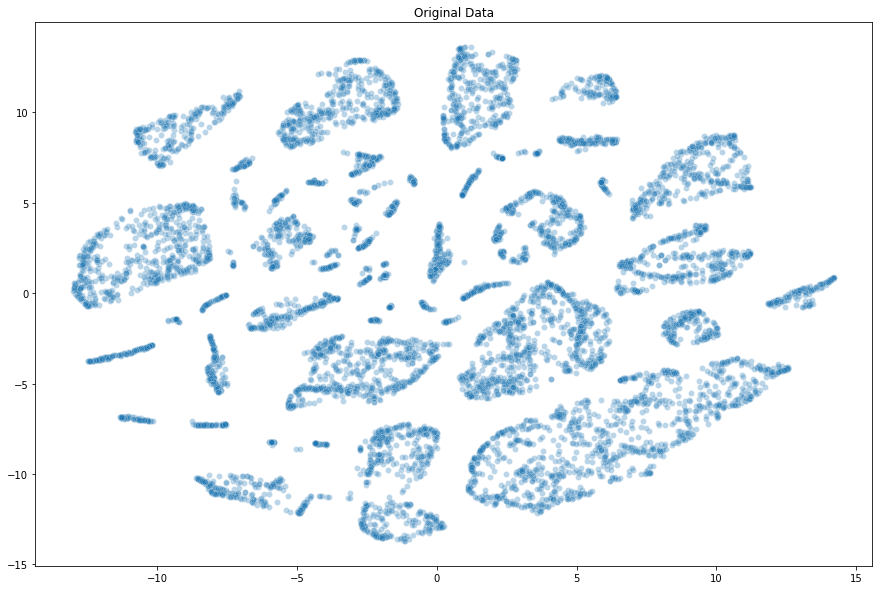

In [47]:
plt.figure(figsize=(15, 10))
sns.scatterplot(
    x=data_tsne[:,0],
    y=data_tsne[:,1],
    data=data_tsne,
    alpha=0.3
).set(title='Original Data');

# **PCA**

In [20]:
pca = PCA()
pca_df = pd.DataFrame(pca.fit_transform(data), index=data.index, columns=data.columns)

Text(0, 0.5, 'Cumulative explained variance')

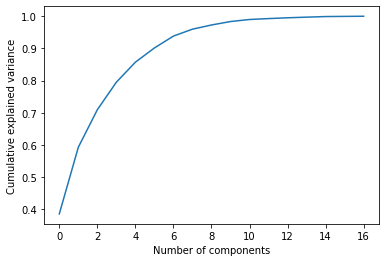

In [22]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

We can see that the best number of components is 7

In [29]:
pca = PCA(n_components=7)
pca_df = pd.DataFrame(pca.fit_transform(data), index=data.index)

## T-SNE

In [37]:
tsne = TSNE(n_components=2, n_jobs=-1, perplexity=30, random_state=1, n_iter=300, verbose=0)
pca_tsne = tsne.fit_transform(pca_df)

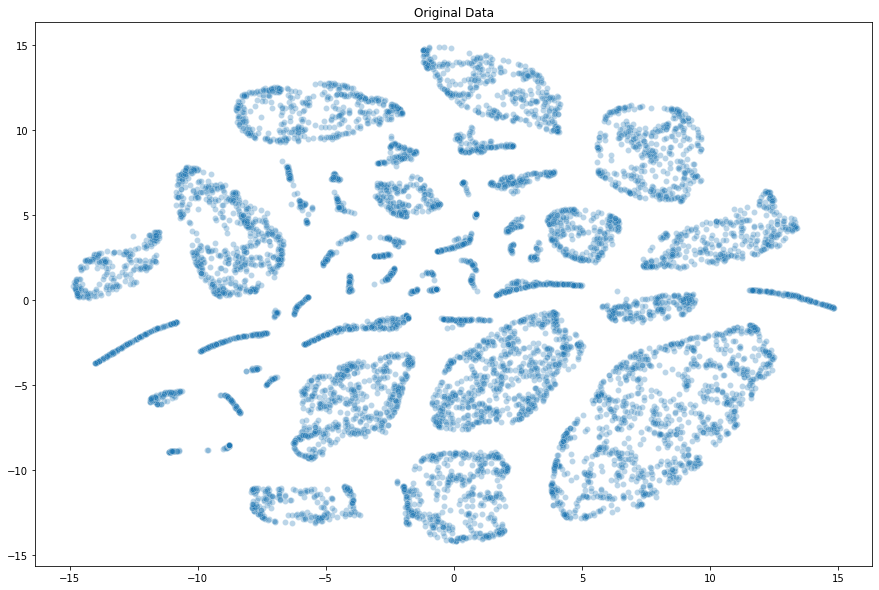

In [46]:
plt.figure(figsize=(15, 10))
sns.scatterplot(
    x=pca_tsne[:,0],
    y=pca_tsne[:,1],
    data=pca_tsne,
    alpha=0.3
).set(title='Original Data');

# **Kernel PCA**

In [40]:
kpca = KernelPCA(n_components=7, kernel='rbf')
kpca_df = pd.DataFrame(kpca.fit_transform(data), index=data.index)

In [41]:
tsne = TSNE(n_components=2, n_jobs=-1, perplexity=30, random_state=1, n_iter=300, verbose=0)
kpca_tsne = tsne.fit_transform(kpca_df)

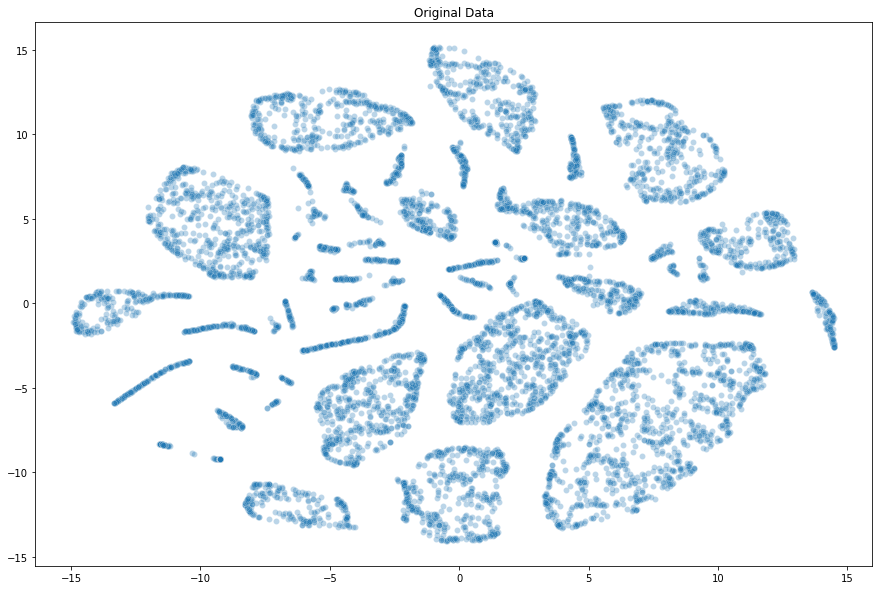

In [45]:
plt.figure(figsize=(15, 10))
sns.scatterplot(
    x=kpca_tsne[:,0],
    y=kpca_tsne[:,1],
    data=kpca_tsne,
    alpha=0.3
).set(title='Original Data');